In [1]:
# --- Block 1: Import Libraries & Load Dataset ---
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset

df = pd.read_csv('retailsales.csv')

print("Dataset Info:\n")
print(df.info())
df.head()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
# --- Block 2: Explore Dataset ---

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique Shopping Malls (Regions):")
print(df['shopping_mall'].unique())

# Convert invoice_date to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Create a new column for total sales (quantity * price)
df['total_sales'] = df['quantity'] * df['price']

df.describe()



Missing Values:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Unique Shopping Malls (Regions):
['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']


,age,quantity,price,invoice_date,total_sales
count,99457.000000,99457.000000,99457.000000,40029,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-14 07:51:24.134002688,2528.789268
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,5.230000
25%,30.000000,2.000000,45.450000,2021-07-09 00:00:00,136.350000
50%,43.000000,3.000000,203.300000,2022-02-06 00:00:00,600.170000
75%,56.000000,4.000000,1200.320000,2022-09-02 00:00:00,2700.720000
max,69.000000,5.000000,5250.000000,2023-12-02 00:00:00,26250.000000
std,14.990054,1.413025,941.184567,NaN,4222.475781


In [5]:
# --- Block 3: Identify Variables for Aggregation ---

region_col = 'shopping_mall'
sales_col = 'total_sales'
category_col = 'category'

print(f"Selected columns for aggregation: {region_col}, {sales_col}, {category_col}")


Selected columns for aggregation: shopping_mall, total_sales, category


In [7]:
# --- Block 3: Identify Variables for Aggregation ---

region_col = 'shopping_mall'
sales_col = 'total_sales'
category_col = 'category'

print(f"Selected columns for aggregation: {region_col}, {sales_col}, {category_col}")


Selected columns for aggregation: shopping_mall, total_sales, category


In [9]:
# --- Block 4: Group by Region ---

sales_by_region = df.groupby(region_col)[sales_col].sum().reset_index().sort_values(by=sales_col, ascending=False)
print("Total Sales by Region (Top 10):")
display(sales_by_region.head(10))


Total Sales by Region (Top 10):


,shopping_mall,total_sales
5,Mall of Istanbul,50872481.68
4,Kanyon,50554231.10
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
3,Istinye Park,24618827.68
9,Zorlu Center,12901053.82
0,Cevahir AVM,12645138.20
8,Viaport Outlet,12521339.72
1,Emaar Square Mall,12406100.29
2,Forum Istanbul,12303921.24


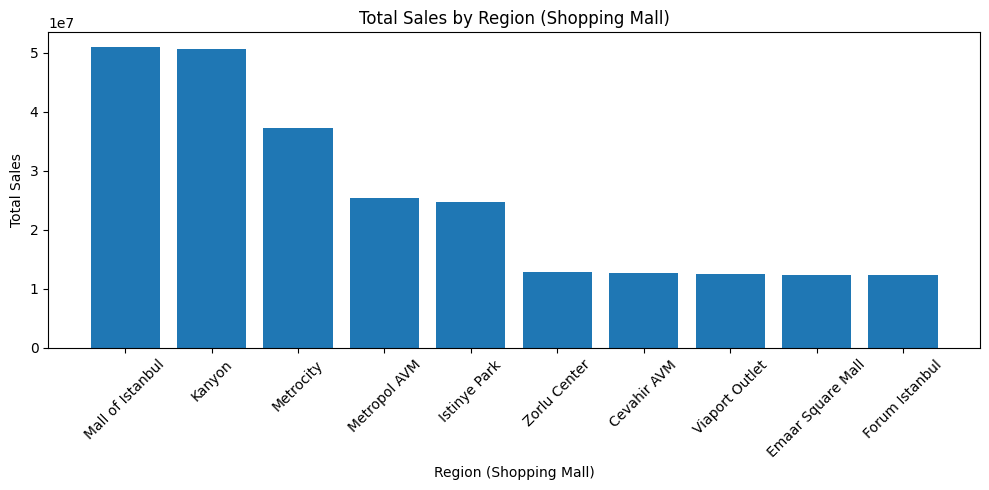

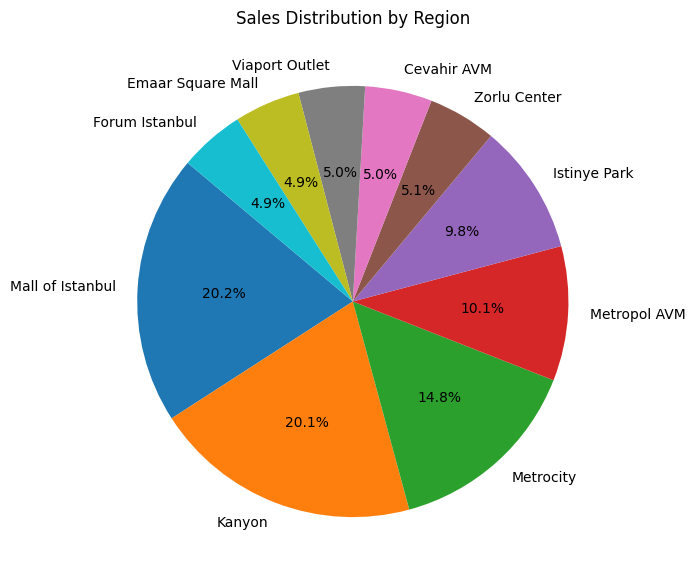

In [11]:
# --- Block 5: Visualization — Sales by Region ---

# Bar Plot
plt.figure(figsize=(10,5))
plt.bar(sales_by_region[region_col], sales_by_region[sales_col])
plt.title("Total Sales by Region (Shopping Mall)")
plt.xlabel("Region (Shopping Mall)")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(7,7))
plt.pie(sales_by_region[sales_col], labels=sales_by_region[region_col], autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Region")
plt.show()


In [13]:
# --- Block 6: Identify Top Performing Regions ---

top_regions = sales_by_region.head(5)
print("Top 5 Performing Regions (by Total Sales):")
display(top_regions)


Top 5 Performing Regions (by Total Sales):


,shopping_mall,total_sales
5,Mall of Istanbul,50872481.68
4,Kanyon,50554231.10
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
3,Istinye Park,24618827.68


In [15]:
# --- Block 7: Group by Region and Product Category ---

region_category_sales = (
    df.groupby([region_col, category_col])[sales_col]
    .sum()
    .reset_index()
)

print("Sales by Region and Category:")
display(region_category_sales.head(10))


Sales by Region and Category:


,shopping_mall,category,total_sales
0,Cevahir AVM,Books,44541.00
1,Cevahir AVM,Clothing,5706321.28
2,Cevahir AVM,Cosmetics,321214.00
3,Cevahir AVM,Food & Beverage,44010.45
4,Cevahir AVM,Shoes,3243918.85
5,Cevahir AVM,Souvenir,29723.82
6,Cevahir AVM,Technology,3051300.00
7,Cevahir AVM,Toys,204108.80
8,Emaar Square Mall,Books,41995.80
9,Emaar Square Mall,Clothing,5590490.40


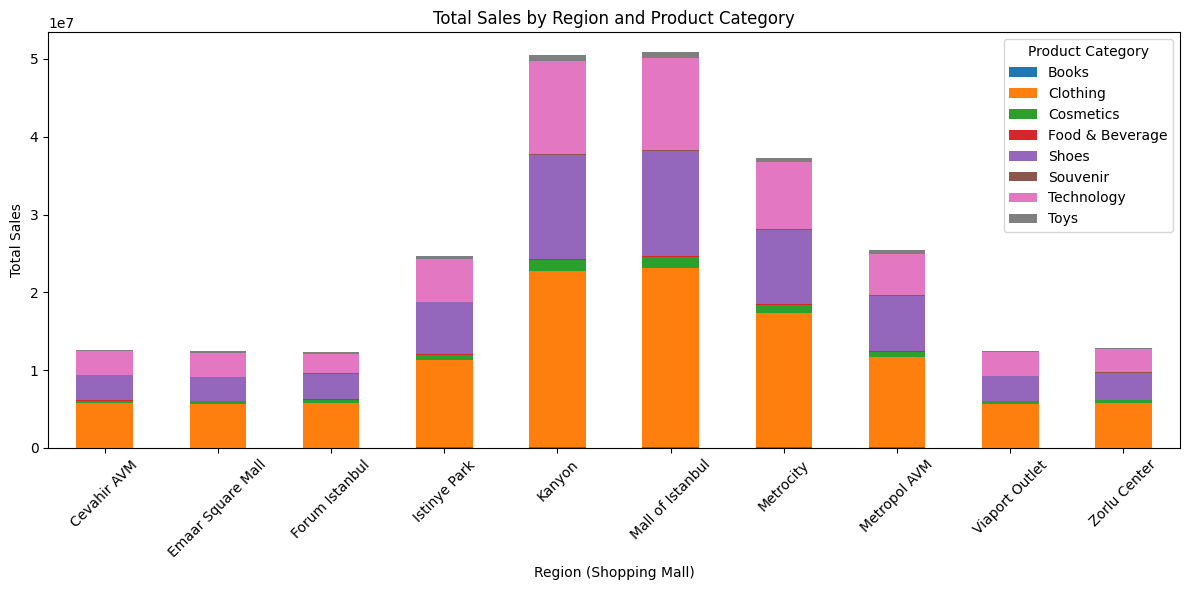

In [17]:
# --- Block 8: Visualization — Stacked Bar Plot ---

# Pivot table for stacked bar
pivot_data = region_category_sales.pivot(index=region_col, columns=category_col, values=sales_col).fillna(0)

# Stacked Bar Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Total Sales by Region and Product Category")
plt.xlabel("Region (Shopping Mall)")
plt.ylabel("Total Sales")
plt.legend(title="Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


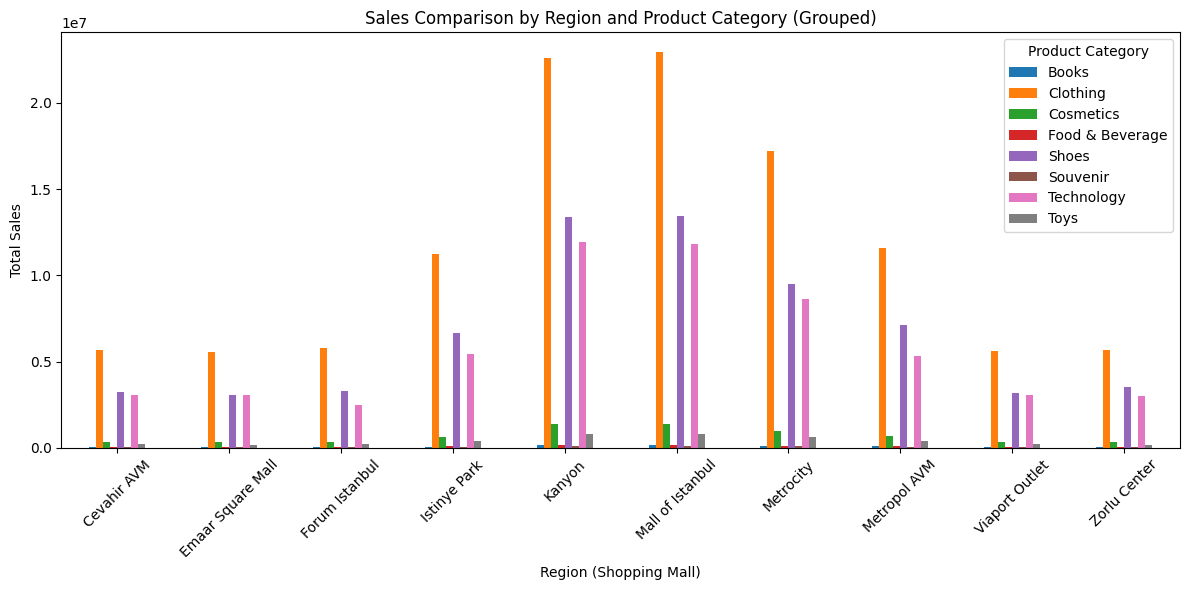

In [19]:
# --- Block 9: Visualization — Grouped Bar Plot ---

pivot_data.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title("Sales Comparison by Region and Product Category (Grouped)")
plt.xlabel("Region (Shopping Mall)")
plt.ylabel("Total Sales")
plt.legend(title="Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
